In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [7]:
df=pd.read_csv("G:\downloads\driver-data.csv")

In [8]:
df.sample(3)

,id,mean_dist_day,mean_over_speed_perc
1188,3423313207,51.19,5
758,3423310589,43.82,3
1013,3423313210,43.80,3


In [9]:
distortion=[]
k=range(1,6)

In [10]:
for i in k:
    kmeanmodel=KMeans(n_clusters=i,max_iter=25)
    kmeanmodel.fit(df)
    distortion.append(kmeanmodel.inertia_)

G:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
G:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
G:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
G:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

Text(0.5, 1.0, 'Elbow Plot')

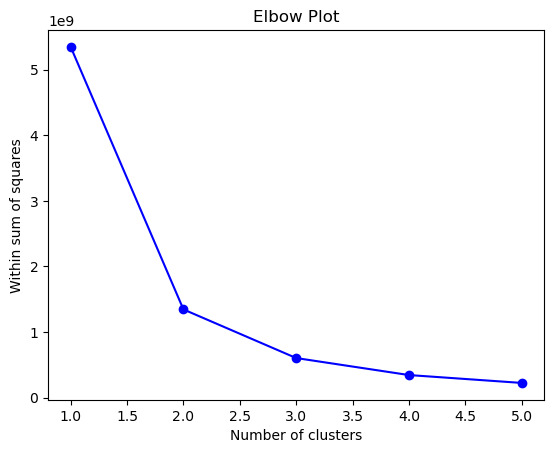

In [11]:
plt.plot(k,distortion,'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Within sum of squares")
plt.title("Elbow Plot")

In [12]:
final_model=KMeans(n_clusters=3,max_iter=25)

In [16]:
final_model.fit(df[["mean_dist_day","mean_over_speed_perc"]])

G:\Newfolder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=25, n_clusters=3)

In [18]:
final_model.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

In [19]:
final_model.labels_

array([0, 0, 0, ..., 1, 1, 1])

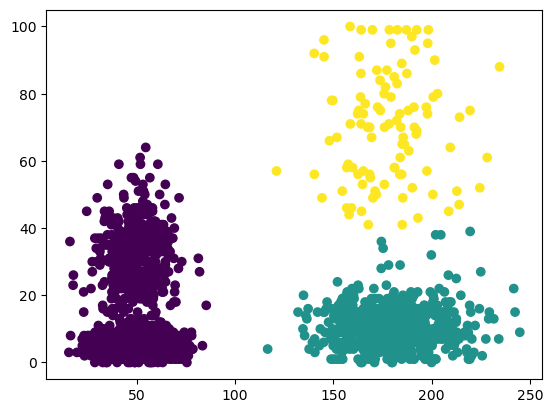

In [21]:
df["K_means"]=final_model.labels_
plt.scatter(x=df["mean_dist_day"],y=df["mean_over_speed_perc"],c=df["K_means"])
plt.show()